# STA 141B: Homework 6
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Zihan

Last Name: Xiao

Student ID: 915532809

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Web scraping the Aggie

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [1]:
import lxml.html as lx
import pandas as pd
import requests
import requests_cache
import numpy as np
import itertools
requests_cache.install_cache("cache")

In [2]:
def web_scrap(url = "https://theaggie.org/campus/", page = 1):
    """
    para: url: url of the article list, page: number of pages
    return: a list of url strings
    """
    links = []
    for i in list(range(1, page+1)):
        url1 = url + 'page/' + str(i)+"/"
        response = requests.get(url1)
        response.raise_for_status()
        doc = response.text
        html = lx.fromstring(doc, base_url = url1)
        html.make_links_absolute()
        link = html.xpath("//h2[@class ='entry-title']/a/@href")
        links = links + [str(x) for x in link]
    return links

In [3]:
web_scrap(page = 1)

['https://theaggie.org/2018/03/13/last-week-in-senate-25/',
 'https://theaggie.org/2018/03/12/uc-regents-will-vote-on-nonresident-tuition-hike-on-wednesday/',
 'https://theaggie.org/2018/03/12/cheating-allegations-in-soc-46a/',
 'https://theaggie.org/2018/03/12/chancellor-creates-three-task-forces-to-improve-student-life/',
 'https://theaggie.org/2018/03/06/duke-law-professor-presents-lecture-voting-rights-law/',
 'https://theaggie.org/2018/03/05/last-week-senate-25-8/',
 'https://theaggie.org/2018/03/05/icc-warns-students-wary-suspicious-job-offering/',
 'https://theaggie.org/2018/03/04/uc-davis-student-protester-arrested-yiannopoulos-talk-last-year-awaits-trial/',
 'https://theaggie.org/2018/03/01/executive-ticket-candidates-claim-biases-non-asucd-affiliated-individuals/',
 'https://theaggie.org/2018/03/01/happiness-campaign-strives-less-stress-joy/',
 'https://theaggie.org/2018/02/27/senator-term-review-yajaira-ramirez-sigala/',
 'https://theaggie.org/2018/02/27/calpirgs-winter-quar

In [4]:
web_scrap(page = 2)

['https://theaggie.org/2018/03/13/last-week-in-senate-25/',
 'https://theaggie.org/2018/03/12/uc-regents-will-vote-on-nonresident-tuition-hike-on-wednesday/',
 'https://theaggie.org/2018/03/12/cheating-allegations-in-soc-46a/',
 'https://theaggie.org/2018/03/12/chancellor-creates-three-task-forces-to-improve-student-life/',
 'https://theaggie.org/2018/03/06/duke-law-professor-presents-lecture-voting-rights-law/',
 'https://theaggie.org/2018/03/05/last-week-senate-25-8/',
 'https://theaggie.org/2018/03/05/icc-warns-students-wary-suspicious-job-offering/',
 'https://theaggie.org/2018/03/04/uc-davis-student-protester-arrested-yiannopoulos-talk-last-year-awaits-trial/',
 'https://theaggie.org/2018/03/01/executive-ticket-candidates-claim-biases-non-asucd-affiliated-individuals/',
 'https://theaggie.org/2018/03/01/happiness-campaign-strives-less-stress-joy/',
 'https://theaggie.org/2018/02/27/senator-term-review-yajaira-ramirez-sigala/',
 'https://theaggie.org/2018/02/27/calpirgs-winter-quar

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

* If you are having trouble working with unicode characters see [the python 3 documentation](https://docs.python.org/3/howto/unicode.html).

In [5]:
def article_scape(url):
    """
    para: the url of the article
    return: a dictionary with keys "url", "title", "text", and "author"
    """
    response = requests.get(url)
    response.raise_for_status()
    doc = response.text
    html = lx.fromstring(doc, base_url = url)
    html.make_links_absolute()
    title = [x.text_content() for x in html.xpath("//h1[@class ='entry-title']")][0]
    text1 = html.xpath("//p[position()<last()-2]")
    text2 = html.xpath("//p[position()>last()-3]")
    text = " ".join([x.text_content() for x in text1])
    #the author usually shows in the last line, if it doesn't show there, then we extract it from class "author-name author"
    author = [x.text_content() for x in text2]
    if 'written' in str(author[0]).lower()[0:12]:
        author = author[0]
    elif 'written' in str(author[1]).lower()[0:12]: 
        author = author[1]
    elif 'written' in str(author[2]).lower()[0:12]:
        author = author[2]
    else:
        author = html.xpath("//a[@class = 'author-name author']/text()")[0]
    content  = {"author":author, "text":text, "title": title, "url":url}
    return content

In [6]:
article_scape("https://theaggie.org/2018/03/12/uc-regents-will-vote-on-nonresident-tuition-hike-on-wednesday/")

{'author': 'Written by: Hannah Holzer — campus@theaggie.org',
 'text': 'Proposed $978 tuition hike At the upcoming UC Regents meeting which will take place from March 13 to 15 at UCLA, the Regents will vote on a proposed tuition increase for non-California residents who attend the UCs. The proposed tuition hike is an increase of $978 — a 3.5 percent hike. The fee increase would result in an additional $34.8 million for the UC. In May, the Regents will vote on a proposed tuition hike of $342 for in-state students. The UC Regents were originally supposed to vote on the proposed tuition hikes earlier this year, in January, but after widespread student backlash — including at UC Davis — the vote was delayed. In the online Executive Summary of the action item on the “Approval of Nonresident Supplemental Tuition,” the Regents are asked to approve the tuition hike “because ongoing discussions with the State are unlikely to change.” Earlier this year, California Governor Jerry Brown proposed a

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [7]:
campus_url = web_scrap("https://theaggie.org/campus/", page = 4)
campus_df = pd.DataFrame([article_scape(x) for x in campus_url])
campus_df["category"] = "campus"
campus_df.head()

,author,text,title,url,category
0,Written by: George Liao — campus@theaggie.org,Funding for Student Advocates for Mental Healt...,Last week in Senate,https://theaggie.org/2018/03/13/last-week-in-s...,campus
1,Written by: Hannah Holzer — campus@theaggie.org,Proposed $978 tuition hike At the upcoming UC ...,UC Regents will vote on nonresident tuition hi...,https://theaggie.org/2018/03/12/uc-regents-wil...,campus
2,Written by: Sabrina Habchi — campus@theaggie.org,Controversy over academic honesty suspicions i...,Cheating allegations in SOC 46A,https://theaggie.org/2018/03/12/cheating-alleg...,campus
3,Written by: Jacqueline Moore — campus@theaggie...,"Task forces to review affordable housing, food...",Chancellor creates three task forces to improv...,https://theaggie.org/2018/03/12/chancellor-cre...,campus
4,Written by: Jacqueline Moore — campus@theaggie...,Guy-Uriel Charles speaks at King Hall Duke Uni...,Duke law professor presents lecture on voting ...,https://theaggie.org/2018/03/06/duke-law-profe...,campus


In [8]:
city_url = web_scrap("https://theaggie.org/city/", page = 4)
city_df = pd.DataFrame([article_scape(x) for x in city_url])
city_df["category"] = "city"
city_df.head()

,author,text,title,url,category
0,theaggie,Who is Monica? Feb. 19 “Heard only for last 10...,Police Logs,https://theaggie.org/2018/03/13/police-logs-44/,city
1,Written by: Genevieve Murphy-Skilling — city@t...,Students bike in freezing conditions to help p...,Davis students pedal for polar bears,https://theaggie.org/2018/03/13/davis-students...,city
2,Written by: Rabiya Oberoi — city@theaggie.org,Yolo Interfaith Alliance for Climate Justice h...,Sixth annual climate conference: growing resil...,https://theaggie.org/2018/03/12/sixth-annual-c...,city
3,Written by: Stella Tran — city@theaggie.org,Financial Oversight Committee has open seats t...,New committee members to join Yolo County,https://theaggie.org/2018/03/11/new-committee-...,city
4,Written by: Hannan Waliullah — city@theaggie.org,Workshop aimed to help parents understand chil...,Yolo Rainbow Families hosts workshops about ge...,https://theaggie.org/2018/03/11/yolo-rainbow-f...,city


In [9]:
data = pd.concat([campus_df,city_df])
data.head()

,author,text,title,url,category
0,Written by: George Liao — campus@theaggie.org,Funding for Student Advocates for Mental Healt...,Last week in Senate,https://theaggie.org/2018/03/13/last-week-in-s...,campus
1,Written by: Hannah Holzer — campus@theaggie.org,Proposed $978 tuition hike At the upcoming UC ...,UC Regents will vote on nonresident tuition hi...,https://theaggie.org/2018/03/12/uc-regents-wil...,campus
2,Written by: Sabrina Habchi — campus@theaggie.org,Controversy over academic honesty suspicions i...,Cheating allegations in SOC 46A,https://theaggie.org/2018/03/12/cheating-alleg...,campus
3,Written by: Jacqueline Moore — campus@theaggie...,"Task forces to review affordable housing, food...",Chancellor creates three task forces to improv...,https://theaggie.org/2018/03/12/chancellor-cre...,campus
4,Written by: Jacqueline Moore — campus@theaggie...,Guy-Uriel Charles speaks at King Hall Duke Uni...,Duke law professor presents lecture on voting ...,https://theaggie.org/2018/03/06/duke-law-profe...,campus


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [10]:
import nltk
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("brown")
nltk.download("wordnet")
nltk.download("stopwords")
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import re

def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

stop = stopwords.words("english")

[nltk_data] Downloading package punkt to /Users/zihanxiao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/zihanxiao/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /Users/zihanxiao/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zihanxiao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zihanxiao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Question 1
What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

In [21]:
blob = TextBlob(re.sub('[^a-zA-Z ]',"",data.iloc[1,1]))
blob

TextBlob("Proposed  tuition hike At the upcoming UC Regents meeting which will take place from March  to  at UCLA the Regents will vote on a proposed tuition increase for nonCalifornia residents who attend the UCs The proposed tuition hike is an increase of   a  percent hike The fee increase would result in an additional  million for the UC In May the Regents will vote on a proposed tuition hike of  for instate students The UC Regents were originally supposed to vote on the proposed tuition hikes earlier this year in January but after widespread student backlash  including at UC Davis  the vote was delayed In the online Executive Summary of the action item on the Approval of Nonresident Supplemental Tuition the Regents are asked to approve the tuition hike because ongoing discussions with the State are unlikely to change Earlier this year California Governor Jerry Brown proposed a smaller increase in state funding to the UC for  than expected In January the Board decided to table full 

In [22]:
data.iloc[1,1]

'Proposed $978 tuition hike At the upcoming UC Regents meeting which will take place from March 13 to 15 at UCLA, the Regents will vote on a proposed tuition increase for non-California residents who attend the UCs. The proposed tuition hike is an increase of $978 — a 3.5 percent hike. The fee increase would result in an additional $34.8 million for the UC. In May, the Regents will vote on a proposed tuition hike of $342 for in-state students. The UC Regents were originally supposed to vote on the proposed tuition hikes earlier this year, in January, but after widespread student backlash — including at UC Davis — the vote was delayed. In the online Executive Summary of the action item on the “Approval of Nonresident Supplemental Tuition,” the Regents are asked to approve the tuition hike “because ongoing discussions with the State are unlikely to change.” Earlier this year, California Governor Jerry Brown proposed a smaller increase in state funding to the UC for 2018-19 than expected.

In [47]:
def topic_word(corpus):
    """
    para: a list of corpus we want to use,
    return: a data frame with repeated key words and the corresponding sum of frequency in each article
    """
    for i in range(len(corpus)):
        blob = TextBlob(re.sub('[^a-zA-Z ]',"",corpus[i]))
        new_text = " ".join(w for w in blob.words if w.lower() not in stop)
        blob = TextBlob(new_text)
        tags = [wordnet_pos(x[1]) for x in blob.pos_tags]
        new_text = " ".join(x.lemmatize(t) for x, t in zip(blob.words, tags))
        blob = TextBlob(new_text)
        corpus[i] = blob
    fre = pd.DataFrame(d.word_counts for d in corpus).T
    fre = fre.fillna(0)
    fre = fre/fre.sum(axis=0)
    count = pd.DataFrame(fre.apply(sum, axis=1), columns = ['fre_sum'])
    count = count.sort_values(by = 'fre_sum', ascending = False)
    return count

In [48]:
from matplotlib import pyplot as plt

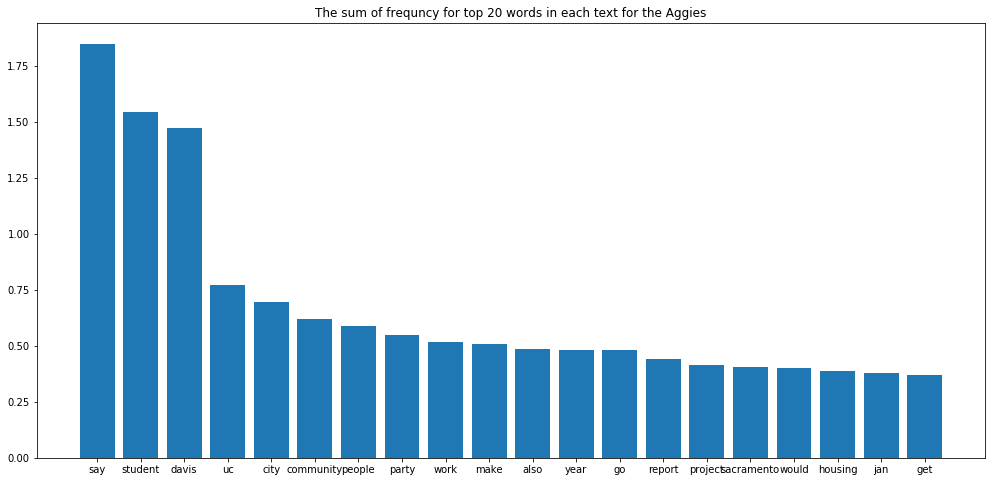

In [144]:
# draw bar plot to show the most frequent key words
aggie_text = list(data["text"])
aggie_fre = topic_word(aggie_text).head(20)
a = list(aggie_fre.index)
a1 = range(len(a))
b = list(aggie_fre.fre_sum)
plt.figure(figsize = (17,8))
plt.bar(a1,b)
plt.xticks(a1,a)
plt.title("The sum of frequncy for top 20 words in each text for the Aggies")
plt.show()

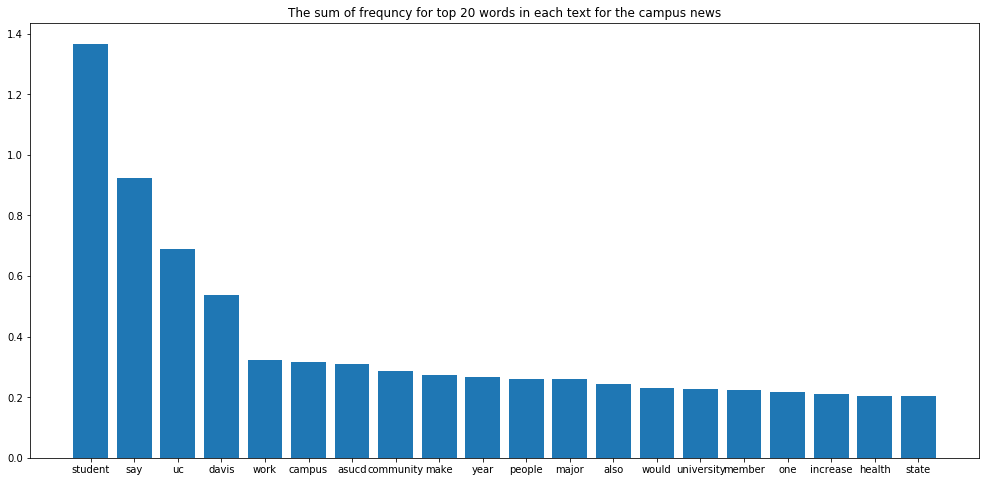

In [49]:
# draw bar plot to show the most frequent key words
campus_text = list(data[data["category"] == "campus"].text)
campus_fre = topic_word(campus_text).head(20)
a = list(campus_fre.index)
a1 = range(len(a))
b = list(campus_fre.fre_sum)
plt.figure(figsize = (17,8))
plt.bar(a1,b)
plt.xticks(a1,a)
plt.title("The sum of frequncy for top 20 words in each text for the campus news")
plt.show()

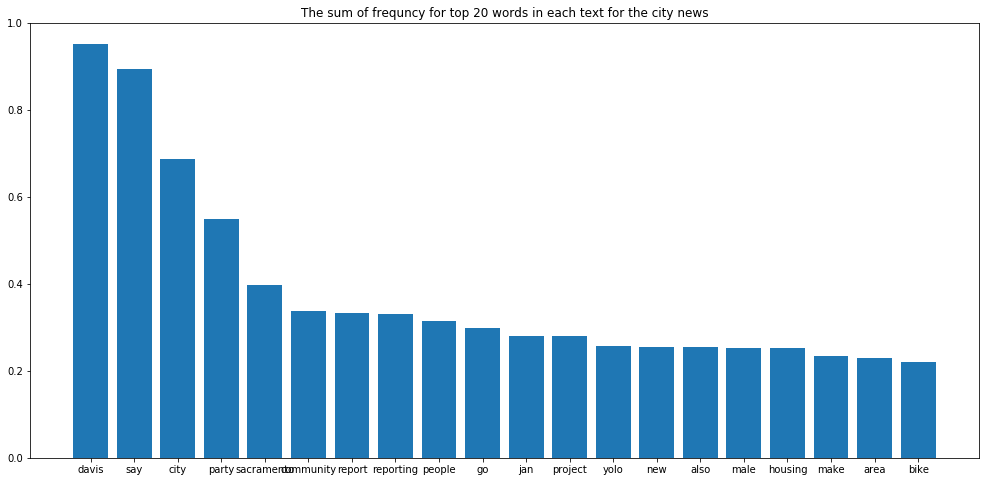

In [50]:
# draw bar plot to show the most frequent key words
city_text = list(data[data["category"] == "city"].text)
city_fre = topic_word(city_text).head(20)
a = list(city_fre.index)
a1 = range(len(a))
b = list(city_fre.fre_sum)
plt.figure(figsize = (17,8))
plt.bar(a1,b)
plt.xticks(a1,a)
plt.title("The sum of frequncy for top 20 words in each text for the city news")
plt.show()

From these 3 bar plot we can know that uc davis students is the hottest topic in the Aggies. And except those words that always use in ucdaivs website articles, such as "uc", "davis" and "say", other key words are showed with different frequency. In campus news, the frequent words, which can be interpreted as topics, include "student", "asucd", "major", "health" and etc. However, in city news, it focus more on "reporting", "city", "project" and "housing", which is obviously different from the topics in campus news.

## Question 2
What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
def find_top_pairs(data):
    """
    para: a list contain the corpus we study
    return: list of the top 3 pairs of most similar articles
    """
    tf_idf = TfidfVectorizer().fit_transform(title)
    spar_matrix = (tf_idf * tf_idf.T).A
    diag_matrix = np.diag(np.diag(spar_matrix))
    new_matrix = (spar_matrix-diag_matrix)
    new_df = pd.DataFrame(columns = ["row", "column", "value"])
    for i in range(len(title)):
        for j in range(i+1, len(title)):
            df = pd.DataFrame({"row": [i], "column": [j], "value": new_matrix[i][j]})
            new_df = pd.concat([new_df, df])
            new_df = new_df.sort_values(by = "value", ascending = False).head(3)
    return [[data[x],data[y]] for x, y in zip(list(new_df.row), list(new_df.column))]

In [52]:
title = list(data["title"])
find_top_pairs(title)

[['Police Logs', 'Police Logs'],
 ['Police Logs', 'Police Logs'],
 ['Police Logs', 'Police Logs']]

In [53]:
#find the repeated titles
import collections
sorted(collections.Counter(title).items(), key = lambda item:item[1], reverse=True)

[('Police Logs', 11),
 ('Last week in Senate', 4),
 ('UC Regents will vote on nonresident tuition hike on Wednesday', 1),
 ('Cheating allegations in SOC 46A', 1),
 ('Chancellor creates three task forces to improve student life', 1),
 ('Duke law professor presents lecture on voting rights law', 1),
 ('Last Week in Senate', 1),
 ('ICC warns students to be wary of suspicious job offering', 1),
 ('UC Davis student protester arrested at Yiannopoulos talk last year awaits trial',
  1),
 ('Executive ticket candidates claim biases against non-ASUCD affiliated individuals',
  1),
 ('Happiness Campaign strives for less stress, more joy', 1),
 ('Senator Term Review: Yajaira Ramirez Sigala', 1),
 ('CALPIRG’s Winter Quarter pledge drives', 1),
 ('ASUCD election results announced', 1),
 ('Sexual Violence Prevention and Response Board created', 1),
 ('In Memoriam: Markos Huerta', 1),
 ('Traditional Chinese music classes to be offered through UC Davis Confucius Institute',
  1),
 ('ASUCD executive tic

In [54]:
#delete the repeated titles
for i in range(len(title)):
    if (title[i].lower() != 'police logs') & (title[i].lower() != 'last week in senate'):
        title[i] = title[i]
    else:
        title[i] = ""
find_top_pairs(title)

[['West Davis Active Adult Community in development',
  'Social Services Commission meets to discuss West Davis Active Adult Community'],
 ['Senator Term Review: Marcos Rodriguez',
  'Senator term review: Michael Gofman'],
 ['Senator Term Review: Marcos Rodriguez',
  'Senator term review: Khadeja Ibrahim']]

From the output we can know that the first pair are both focus on "West Davis Active Adult Community", which is the same words. And the second and third pairs are both talking about "Senator Term Review".

## Question 3
Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

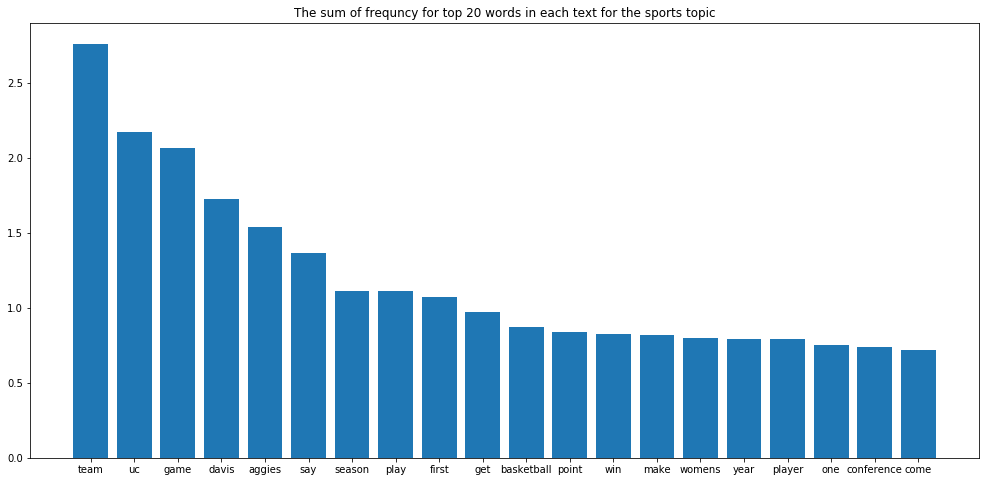

In [55]:
sports_url = [web_scrap("https://theaggie.org/sports/", page = x) for x in list(range(1,5))]
sports_url = list(itertools.chain.from_iterable(sports_url))
sports_df = pd.DataFrame([article_scape(x) for x in sports_url])
sport_topic = topic_word(sports_df.text).head(20)
a = list(sport_topic.index)
a1 = range(len(a))
b = list(sport_topic.fre_sum)
plt.figure(figsize = (17,8))
plt.bar(a1,b)
plt.xticks(a1,a)
plt.title("The sum of frequncy for top 20 words in each text for the sports topic")
plt.show()

The Aggie has different categories. By analyzing the key words of sport category, it shows that it has different topics from the news part. In sports part, articles concentrate more on "team" and "game", while in news, these two words are not frequently appearing. 